# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
#load the the json file as a dict
with open('data/world_bank_projects.json') as json_file:
    json_data = json.load(json_file)

In [9]:
#create a data frame from the loaded file and check the head
data = json_normalize(json_data)
data.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,sector2.Percent,sector2.Name,sector4.Percent,sector4.Name,project_abstract.cdata,theme1.Percent,theme1.Name,sector3.Percent,sector3.Name,_id.$oid
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,26.0,Secondary education,12.0,Tertiary education,The development objective of the Second Phase ...,100,Education for all,16.0,Public administration- Other social services,52b213b38594d8a2be17c780
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,30.0,General public administration sector,NaN,NaN,NaN,30,Other economic management,NaN,NaN,52b213b38594d8a2be17c781
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,NaN,NaN,NaN,NaN,NaN,46,Regional integration,NaN,NaN,52b213b38594d8a2be17c782
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,NaN,NaN,NaN,NaN,NaN,50,Participation and civic engagement,NaN,NaN,52b213b38594d8a2be17c783
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,40.0,Other industry,NaN,NaN,The development objective of the Second Privat...,30,Export development and competitiveness,10.0,SME Finance,52b213b38594d8a2be17c784


# Top 10 Countries with Projects

In [10]:
#count the number of occurances of a country in column 'countryname' and show the top 10 in descending order
data_countryname = pd.DataFrame(data.countryname.value_counts())
data_countryname.head(10)

,countryname
Republic of Indonesia,19
People's Republic of China,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
Nepal,12
People's Republic of Bangladesh,12
Kingdom of Morocco,12
Africa,11
Republic of Mozambique,11


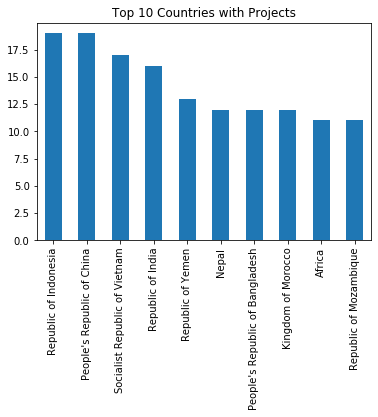

In [11]:
#plot of the top 10 countries with the most projects
data_countryname.head(10).plot(kind='bar', title='Top 10 Countries with Projects', legend=False)

# Find the top 10 major project themes

In [12]:
#create a flattened data frame using the 'mjtheme_namecode' column of the json data
data_theme = json_normalize(json_data, record_path = 'mjtheme_namecode', errors='ignore')

#check the head of the data frame
data_theme.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


## Top 10 Projects by Theme (Code)

In [13]:
#count the number of times each code shows up in the 'code' column and show the top 10 in descending order by count
#use the code since there are empty entries in the name column
data_theme_bycode = pd.DataFrame(data_theme.code.value_counts())
data_theme_bycode.head(10)

,code
11,250
10,216
8,210
2,199
6,168
4,146
7,130
5,77
9,50
1,38


## Fill in Missing Name Entries

In [14]:
#create a dataframe of the entries with an empty 'name' entry
df_missing = data_theme.loc[data_theme['name']=='', ['code', 'name']]
df_missing.head()

,code,name
1,11,
13,6,
17,8,
19,7,
24,2,


In [15]:
#create a table of the unique codes and their corresponding name entry for reference
df_reference = data_theme.loc[data_theme['name']!='', ['code', 'name']].drop_duplicates().set_index('code')
df_reference

,name
code,
8,Human development
1,Economic management
6,Social protection and risk management
5,Trade and integration
2,Public sector governance
11,Environment and natural resources management
7,Social dev/gender/inclusion
4,Financial and private sector development
10,Rural development


In [16]:
#create a copy of the data_theme table
data_filled_in = data_theme

#Iterate through the indexes of the entries with blank names in table df_missing.
#Check the corresponding theme code in df_reference and enter the right name in df_filled_in 
#using the index from df_missing.
for i in df_missing.index:
    code = df_missing.loc[i, 'code']
    data_filled_in.loc[i, 'name'] = df_reference.loc[code, 'name']

#check the head to see if the blank in the 2nd row is filled in
data_filled_in.head()

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


# Top 10 Projects by Theme (Name)

In [17]:
#Create a table of the top 10 projects by theme
data_theme_byname = pd.DataFrame(data_theme.name.value_counts())
data_theme_byname.head(10)

,name
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50
Economic management,38


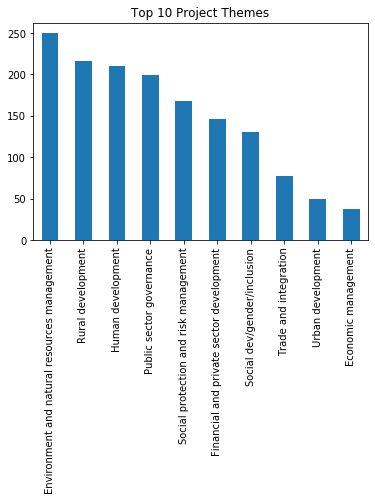

In [18]:
#bar plot the frequency of project themes
data_theme_byname.head(10).plot(kind='bar', title='Top 10 Project Themes', legend=False)

### Alternative code for filling in missing names

In [19]:
#Iterating through the original data_theme frame, we check the name column.  If it is blank, we reference
#the corresponding code in df_reference and fill in the empty entry with the correct name
data_filled_in2 = data_theme
for i,k in data_theme.iterrows():
    if k['name'] == '':
        data_filled_in2['name'] = df_reference[df_missing.loc[i, 'code'], 'name']

#show the value counts for each theme name and check that there are no more blanks.
data_filled_in2.name.value_counts()

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
Name: name, dtype: int64